## Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd


## Load the data to respective pandas dataframe

In [4]:
holidays_url = '../data//holidays_events.csv'
oil_url = '../data//oil.csv'
stores_url = '../data/stores.csv'
test_url = '../data/test.csv'
train_url = '../data//train.csv'
transactions_url = '../data/transactions.csv'

In [5]:
# Load Data to data frame
df_holidays = pd.read_csv(holidays_url)
df_oil = pd.read_csv(oil_url)
df_stores = pd.read_csv(stores_url)
df_test = pd.read_csv(test_url)
df_train = pd.read_csv(train_url)
df_transactions = pd.read_csv(transactions_url)

### Check each data frame

In [6]:
df_holidays.describe()

,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


In [7]:
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
df_oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [9]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
df_stores.describe()

,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


In [11]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [12]:
df_test.describe()

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


In [13]:
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [14]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [15]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [16]:
df_transactions.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [17]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### Create Profile Report

In [18]:
# Helper Functions

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

def check_df(dataframe):
    print('Name of dataframe:', get_df_name(dataframe))
    print('Shape of dataframe:', dataframe.shape)
    print('\n','Concise summary of dataframe:')
    print(dataframe.info())
    print('\n','Check for missing values')
    print(dataframe.isnull().sum())
    print('\n','Check dataframe for numeric and categorical variables')

    numeric_variables = dataframe.select_dtypes(include=[np.number])
    categorical_variables = dataframe.select_dtypes(exclude=[np.number])

    print('Numeric variables in the given dataframe : ',numeric_variables.shape[1])
    print('Categorical variables in the givne dataframe:',categorical_variables.shape[1])

In [19]:
check_df(df_holidays)

Name of dataframe: df_holidays
Shape of dataframe: (350, 6)

 Concise summary of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None

 Check for missing values
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

 Check dataframe for numeric and categorical variables
Numeric variables in the given dataframe :  0
Categorical variables in the givne dataframe: 6


In [20]:
check_df(df_oil)

Name of dataframe: df_oil
Shape of dataframe: (1218, 2)

 Concise summary of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None

 Check for missing values
date           0
dcoilwtico    43
dtype: int64

 Check dataframe for numeric and categorical variables
Numeric variables in the given dataframe :  1
Categorical variables in the givne dataframe: 1


In [21]:
check_df(df_stores)

Name of dataframe: df_stores
Shape of dataframe: (54, 5)

 Concise summary of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None

 Check for missing values
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

 Check dataframe for numeric and categorical variables
Numeric variables in the given dataframe :  2
Categorical variables in the givne dataframe: 3


In [22]:
check_df(df_test)

Name of dataframe: df_test
Shape of dataframe: (28512, 5)

 Concise summary of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None

 Check for missing values
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

 Check dataframe for numeric and categorical variables
Numeric variables in the given dataframe :  3
Categorical variables in the givne dataframe: 2


In [23]:
check_df(df_train)

Name of dataframe: df_train
Shape of dataframe: (3000888, 6)

 Concise summary of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

 Check for missing values
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

 Check dataframe for numeric and categorical variables
Numeric variables in the given dataframe :  4
Categorical variables in the givne dataframe: 2


In [24]:
check_df(df_transactions)

Name of dataframe: df_transactions
Shape of dataframe: (83488, 3)

 Concise summary of dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None

 Check for missing values
date            0
store_nbr       0
transactions    0
dtype: int64

 Check dataframe for numeric and categorical variables
Numeric variables in the given dataframe :  2
Categorical variables in the givne dataframe: 1


### Missing Values and Converting Date

In [25]:
# Convert 'date' to datetime

df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date']) 

In [26]:
# Filling missing oil prices
full_date_range = pd.date_range(start=df_oil['date'].min(), end=df_oil['date'].max())
full_date_df = pd.DataFrame({'date': full_date_range})
df_oil = pd.merge(full_date_df, df_oil, on='date', how='left')
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].interpolate(method='linear')


### Explanation
* A new DataFrame - full_date_range is created with complete date range of oil
* full_date_range is merged with the df_oil to ensure that all dates are represented, even if there are no corresponding oil price values.
* Finally, linear interpolation is used to estimate missing oil prices based on the known data points, assuming a linear trend between them.

### Outlier Detection

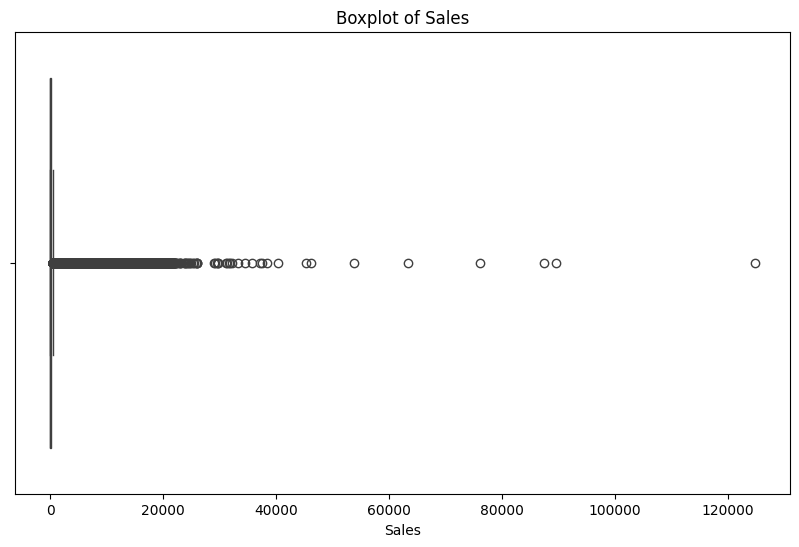

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Boxplot for Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales', data=df_train)
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()


* high skewness, log transformation needed

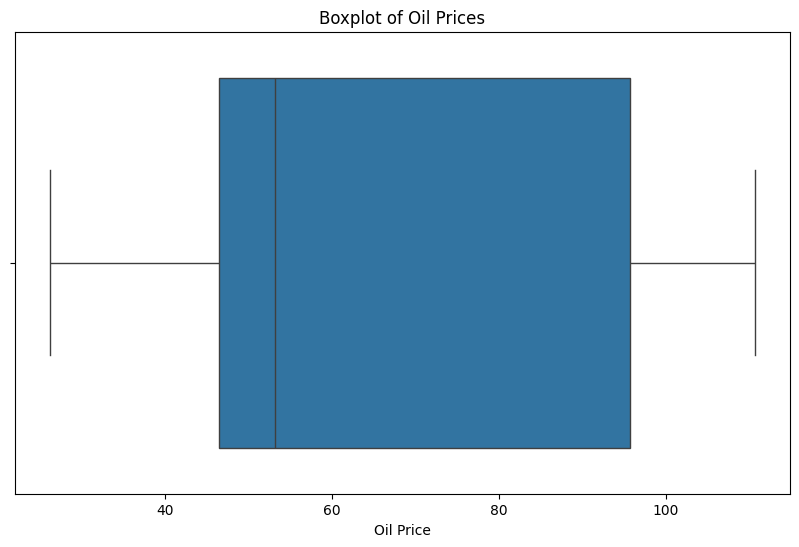

In [28]:
# 2. Boxplot for Oil Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='dcoilwtico', data=df_oil)
plt.title('Boxplot of Oil Prices')
plt.xlabel('Oil Price')
plt.show()


* No Outlier

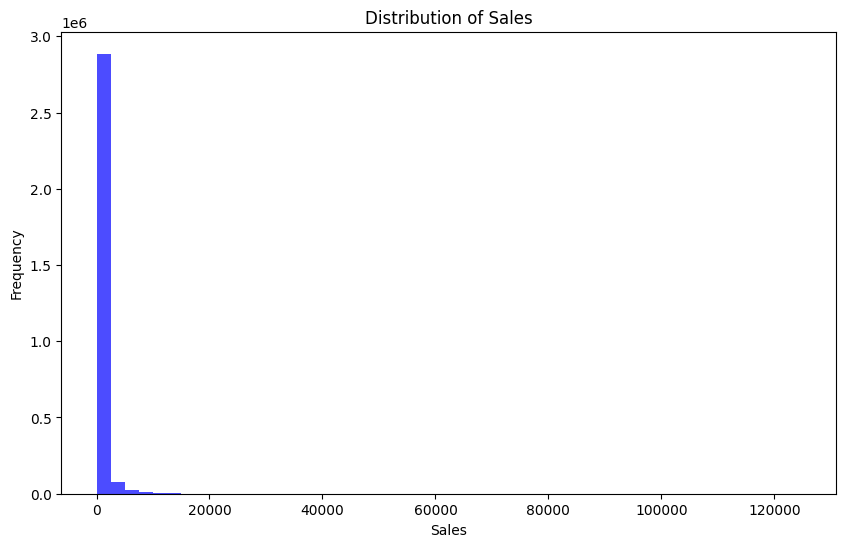

In [29]:
# 4. Histogram for Sales
plt.figure(figsize=(10, 6))
plt.hist(df_train['sales'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


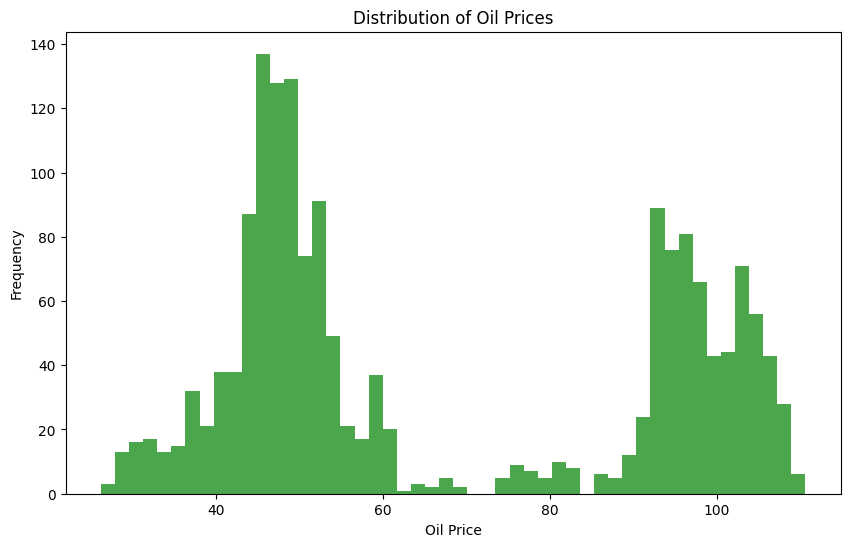

In [30]:
# 5. Histogram for Oil Prices
plt.figure(figsize=(10, 6))
plt.hist(df_oil['dcoilwtico'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Oil Prices')
plt.xlabel('Oil Price')
plt.ylabel('Frequency')
plt.show()


* More EDA needed for Understanding the oil price

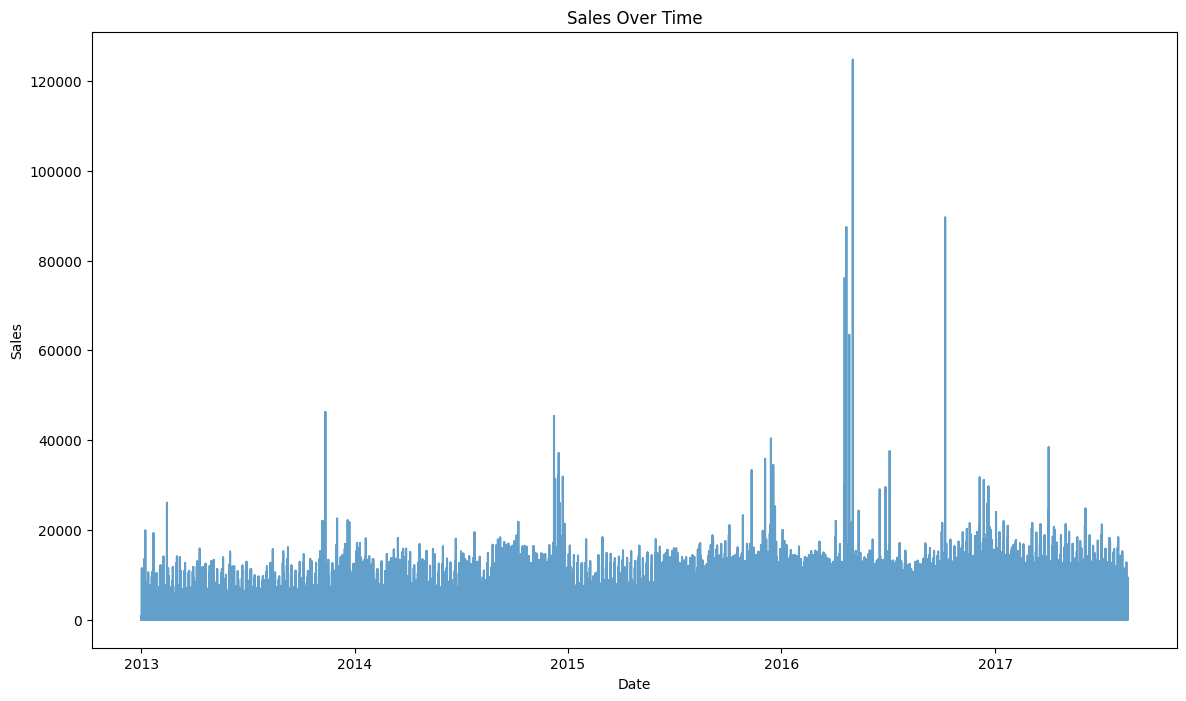

In [31]:
# 6. Time Series Plot for Sales
plt.figure(figsize=(14, 8))
plt.plot(df_train['date'], df_train['sales'], alpha=0.7)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


* high sales at X-Mas time and after the earthquake

### Transformation

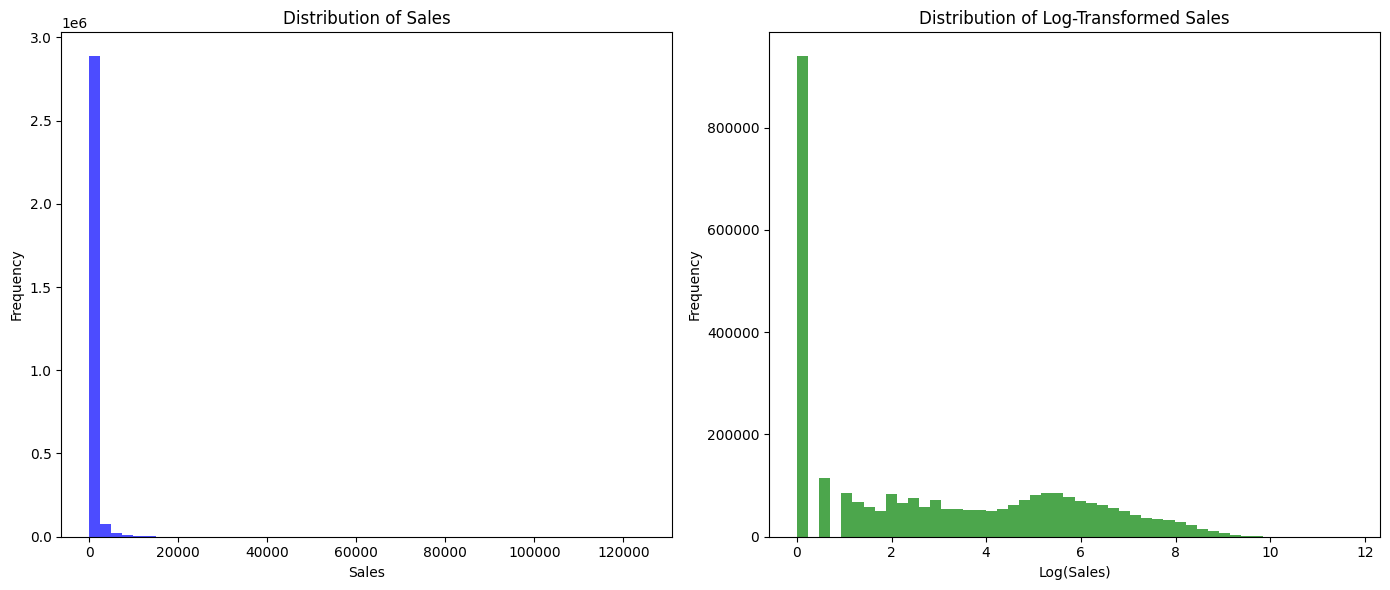

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Apply log transformation
df_train['log_sales'] = np.log1p(df_train['sales'])  # Using log1p to handle zero values

# Visualize the original and transformed data
plt.figure(figsize=(14, 6))

# Histogram of original sales data
plt.subplot(1, 2, 1)
plt.hist(df_train['sales'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Histogram of log-transformed sales data
plt.subplot(1, 2, 2)
plt.hist(df_train['log_sales'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Log-Transformed Sales')
plt.xlabel('Log(Sales)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Original Skewness: 7.3587541405920085
Log-Transformed Skewness: 0.40829529452068164


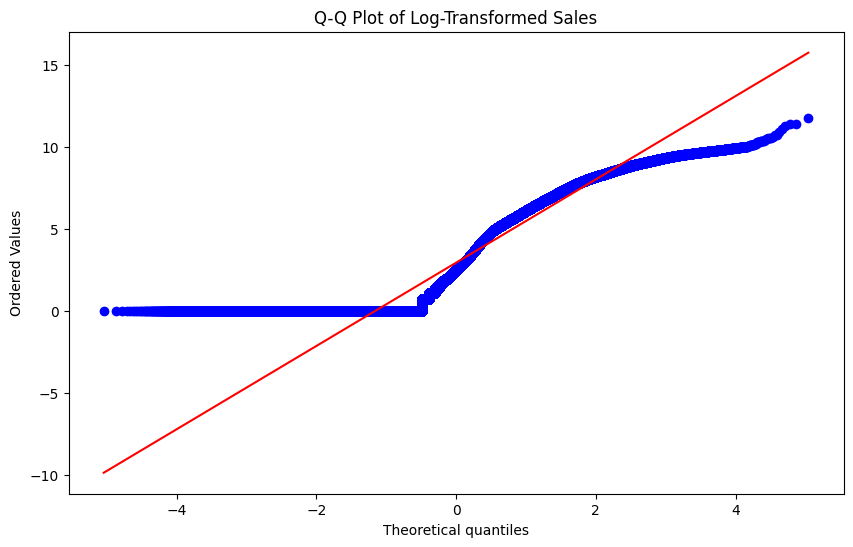

In [33]:
from scipy.stats import skew, probplot

# Calculate skewness
original_skewness = skew(df_train['sales'])
log_skewness = skew(df_train['log_sales'])

print(f'Original Skewness: {original_skewness}')
print(f'Log-Transformed Skewness: {log_skewness}')

# Q-Q plot for log-transformed sales
plt.figure(figsize=(10, 6))
probplot(df_train['log_sales'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Sales')
plt.show()


* transformation against skewness

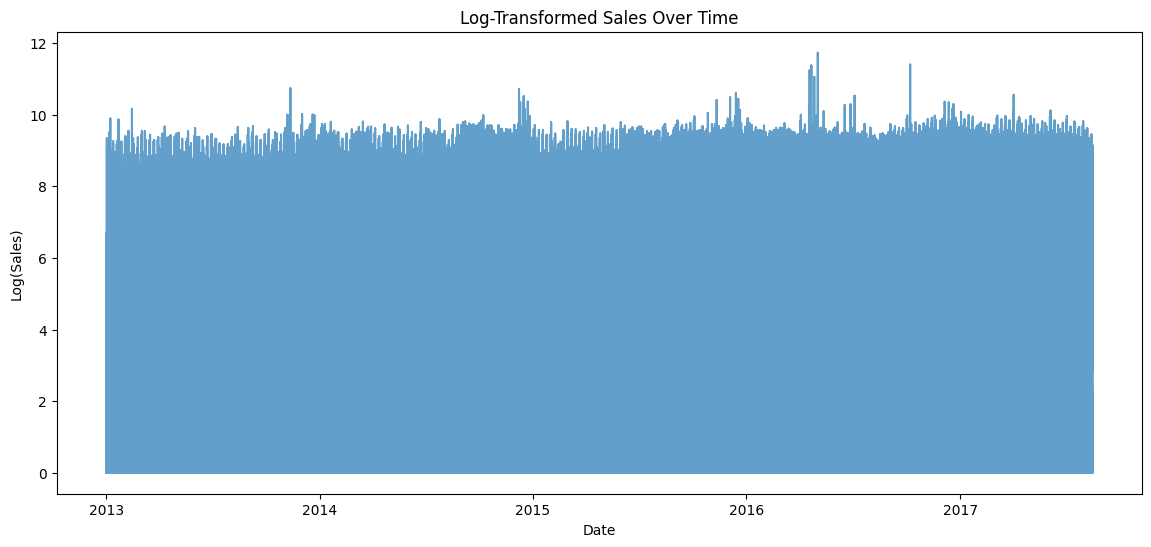

In [34]:
plt.figure(figsize=(14, 6))
plt.plot(df_train['date'], df_train['log_sales'], alpha=0.7)
plt.title('Log-Transformed Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Log(Sales)')
plt.show()


<Figure size 1200x800 with 0 Axes>

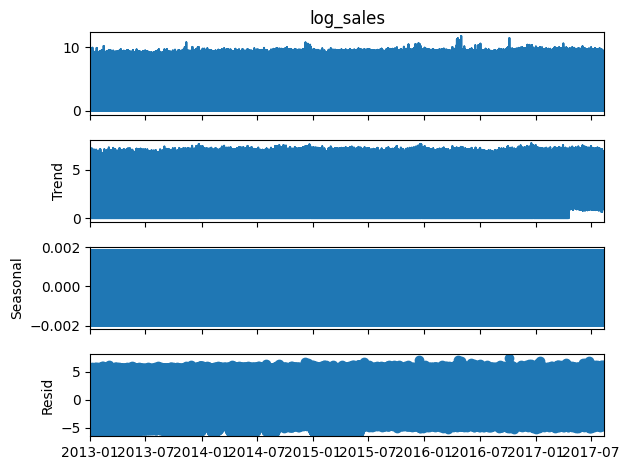

In [35]:
import statsmodels.api as sm

# Set the date as index for seasonal decomposition
df_train.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(df_train['log_sales'], model='additive', period=7)  # Adjust period as necessary

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


* Not sure what the graph is showing

In [36]:
# Example: Merging df_train with df_oil
df_combined = pd.merge(df_train, df_oil, on='date', how='left')


In [37]:
# Check data types of the columns
print(df_combined.dtypes)


date           datetime64[ns]
id                      int64
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
log_sales             float64
dcoilwtico            float64
dtype: object


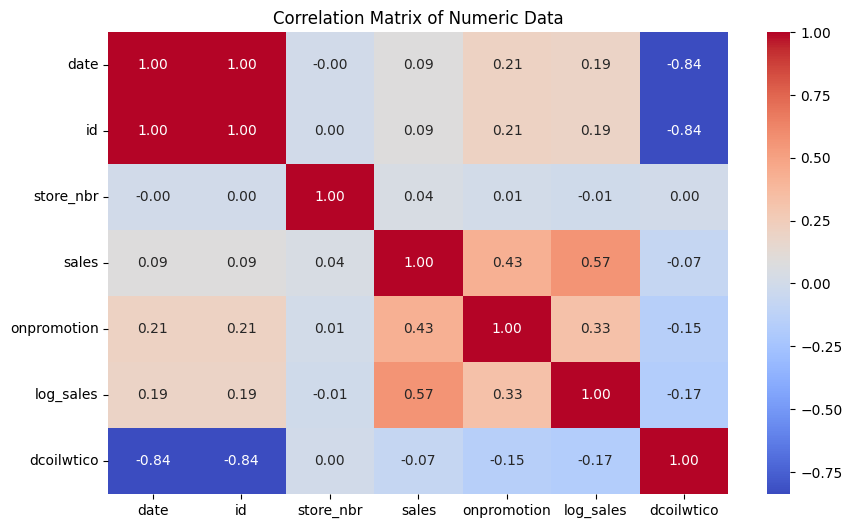

In [38]:
# Select only numeric columns for correlation
df_numeric = df_combined.drop(columns=['family'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Data')
plt.show()


* why is the oil price highly correlated with sales? 

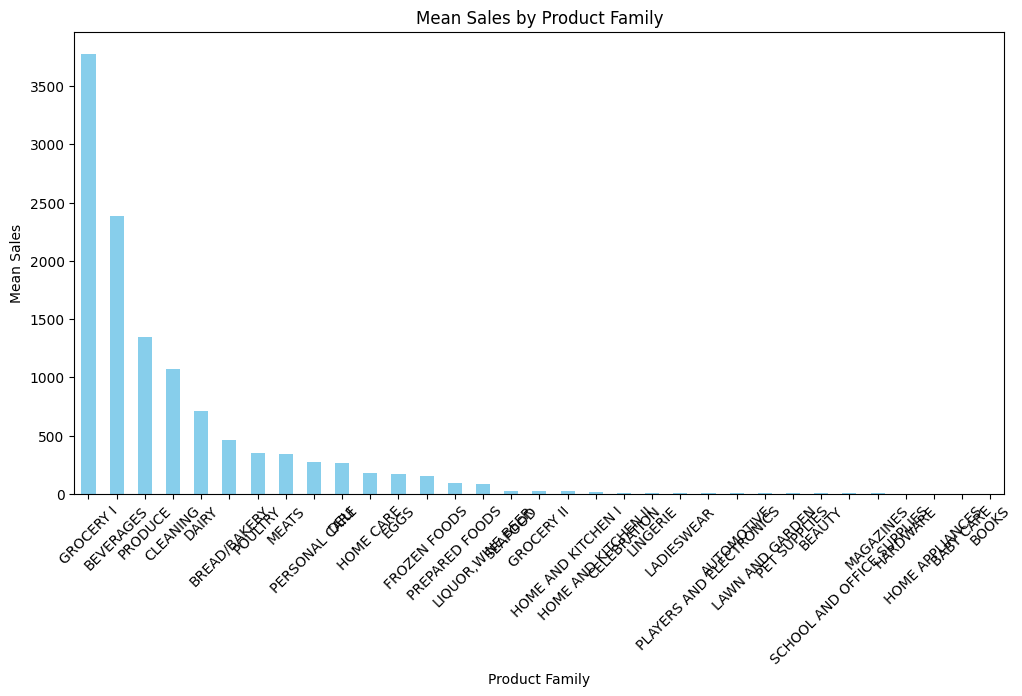

In [39]:
# Calculate mean sales per family
mean_sales_by_family = df_combined.groupby('family')['sales'].mean().sort_values(ascending=False)

# Plotting the mean sales per family
plt.figure(figsize=(12, 6))
mean_sales_by_family.plot(kind='bar', color='skyblue')
plt.title('Mean Sales by Product Family')
plt.xlabel('Product Family')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.show()


* to many product family categories, summarize them? Target encoding useful

### Encoding

In [40]:
import category_encoders as ce

# Target encoding for product families
target_encoder = ce.TargetEncoder(cols=['family'])
df_combined['family_encoded'] = target_encoder.fit_transform(df_combined['family'], df_combined['sales'])


ModuleNotFoundError: No module named 'category_encoders'

### Temporal

In [52]:
import pandas as pd

# Assuming df_combined is your DataFrame and 'date' is the date column
# Convert the 'date' column to datetime format
df_combined['date'] = pd.to_datetime(df_combined['date'])

# Extract useful features from the datetime column
df_combined['year'] = df_combined['date'].dt.year
df_combined['month'] = df_combined['date'].dt.month
df_combined['day'] = df_combined['date'].dt.day
df_combined['day_of_week'] = df_combined['date'].dt.dayofweek
df_combined['is_weekend'] = (df_combined['day_of_week'] >= 5).astype(int)

# Determine the wet and dry seasons
def get_ecuador_season(month):
    if month in [12, 1, 2, 3, 4, 5]:  # Wet Season (December to May)
        return 'Wet'
    else:  # Dry Season (June to November)
        return 'Dry'

df_combined['season'] = df_combined['month'].apply(get_ecuador_season)

# Display the updated DataFrame
print(df_combined.head())


   index       date    id  store_nbr                   family    sales   
0   1871 2013-01-02  1871         11                MAGAZINES    0.000  \
1   1872 2013-01-02  1872         11                    MEATS  832.541   
2   1873 2013-01-02  1873         11            PERSONAL CARE  604.000   
3   1874 2013-01-02  1874         11             PET SUPPLIES    0.000   
4   1875 2013-01-02  1875         11  PLAYERS AND ELECTRONICS    0.000   

   onpromotion  log_sales  dcoilwtico  family_encoded  ...  lag_60_sales   
0            0   0.000000       93.14        2.929082  ...        47.000  \
1            0   6.725683       93.14      341.849965  ...         0.000   
2            0   6.405228       93.14      270.432513  ...         0.000   
3            0   0.000000       93.14        3.921263  ...        38.029   
4            0   0.000000       93.14        6.186857  ...         3.000   

   rolling_7_sales  rolling_14_sales  rolling_30_sales  after_earthquake   
0         7.000000    

* build the time period oriented columns

### Past features

In [40]:
# Create lag features for 'sales' - lag by 1 day, 7 days, and 30 days
df_combined['lag_1_sales'] = df_combined['sales'].shift(1)
df_combined['lag_7_sales'] = df_combined['sales'].shift(7)
df_combined['lag_30_sales'] = df_combined['sales'].shift(30)

# You can do the same for other variables like 'onpromotion' if it's relevant
df_combined['lag_1_onpromotion'] = df_combined['onpromotion'].shift(1)
df_combined['lag_7_onpromotion'] = df_combined['onpromotion'].shift(7)

# Drop NaN values created by shifting
df_combined.dropna(inplace=True)


In [41]:
# Check correlation between lagged sales and current sales
correlation_matrix = df_combined[['sales', 'lag_1_sales', 'lag_7_sales', 'lag_30_sales']].corr()

print(correlation_matrix)


                 sales  lag_1_sales  lag_7_sales  lag_30_sales
sales         1.000000    -0.024233    -0.009067     -0.043518
lag_1_sales  -0.024233     1.000000     0.107486      0.087437
lag_7_sales  -0.009067     0.107486     1.000000     -0.021089
lag_30_sales -0.043518     0.087437    -0.021089      1.000000


In [42]:
# Try additional lag features for sales
df_combined['lag_2_sales'] = df_combined['sales'].shift(2)
df_combined['lag_14_sales'] = df_combined['sales'].shift(14)
df_combined['lag_60_sales'] = df_combined['sales'].shift(60)

# Drop NaN rows created by shifting
df_combined.dropna(inplace=True)

# Check the new correlation matrix
correlation_matrix = df_combined[['sales', 'lag_2_sales', 'lag_14_sales', 'lag_60_sales']].corr()
print(correlation_matrix)


                 sales  lag_2_sales  lag_14_sales  lag_60_sales
sales         1.000000     0.028478     -0.071835      0.095060
lag_2_sales   0.028478     1.000000      0.017755     -0.032128
lag_14_sales -0.071835     0.017755      1.000000     -0.040237
lag_60_sales  0.095060    -0.032128     -0.040237      1.000000


* all lags seem to have no correlation

In [43]:
# Create rolling features (moving averages)
df_combined['rolling_7_sales'] = df_combined['sales'].rolling(window=7).mean()
df_combined['rolling_14_sales'] = df_combined['sales'].rolling(window=14).mean()
df_combined['rolling_30_sales'] = df_combined['sales'].rolling(window=30).mean()

# Drop NaN rows created by rolling window
df_combined.dropna(inplace=True)

# Check correlations for rolling features
correlation_matrix_rolling = df_combined[['sales', 'rolling_7_sales', 'rolling_14_sales', 'rolling_30_sales']].corr()
print(correlation_matrix_rolling)


                     sales  rolling_7_sales  rolling_14_sales   
sales             1.000000         0.468061          0.320615  \
rolling_7_sales   0.468061         1.000000          0.813908   
rolling_14_sales  0.320615         0.813908          1.000000   
rolling_30_sales  0.267850         0.603907          0.771708   

                  rolling_30_sales  
sales                     0.267850  
rolling_7_sales           0.603907  
rolling_14_sales          0.771708  
rolling_30_sales          1.000000  


* rolling sales have high correlation, 7 days have the highest 

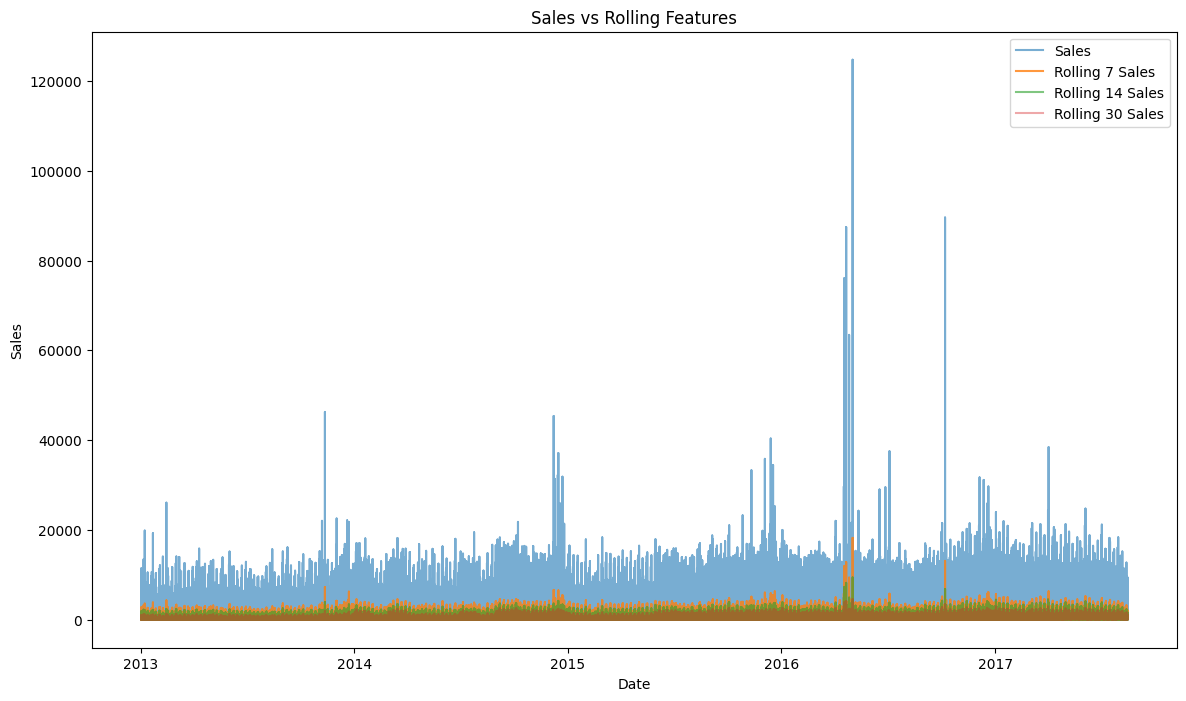

In [44]:
# Plot sales vs rolling features
plt.figure(figsize=(14, 8))

# Plot sales
plt.plot(df_combined['date'], df_combined['sales'], label='Sales', alpha=0.6)

# Plot rolling features
plt.plot(df_combined['date'], df_combined['rolling_7_sales'], label='Rolling 7 Sales', alpha=0.8)
plt.plot(df_combined['date'], df_combined['rolling_14_sales'], label='Rolling 14 Sales', alpha=0.6)
plt.plot(df_combined['date'], df_combined['rolling_30_sales'], label='Rolling 30 Sales', alpha=0.4)

plt.title('Sales vs Rolling Features')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Trend and Seasonality 

In [45]:
df_combined['after_earthquake'] = (df_combined['date'] > '2016-04-16').astype(int)


Time changepoint earthquake

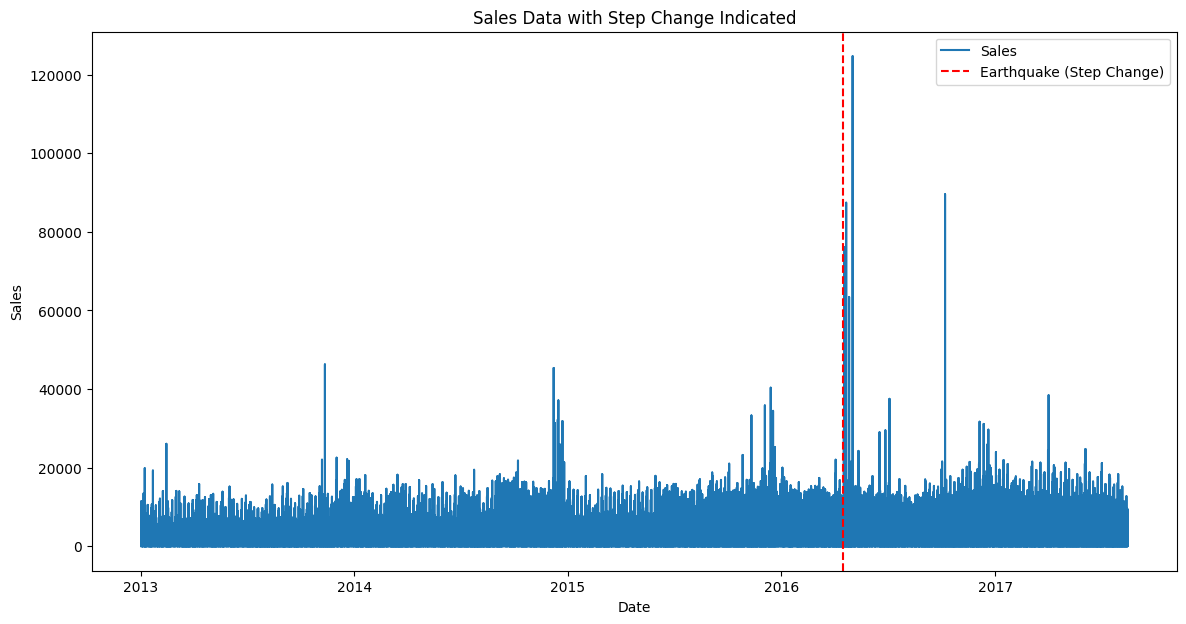

In [46]:
import matplotlib.pyplot as plt

# Plot sales data
plt.figure(figsize=(14, 7))
plt.plot(df_combined['date'], df_combined['sales'], label='Sales')

# Add a vertical line for the step change
plt.axvline(x=pd.to_datetime('2016-04-16'), color='r', linestyle='--', label='Earthquake (Step Change)')

plt.title('Sales Data with Step Change Indicated')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [47]:
# Define the seasonal frequency (e.g., 12 for monthly data)
frequency = 12

# Create Fourier terms
df_combined['fourier_sin'] = np.sin(2 * np.pi * df_combined['month'] / frequency)
df_combined['fourier_cos'] = np.cos(2 * np.pi * df_combined['month'] / frequency)


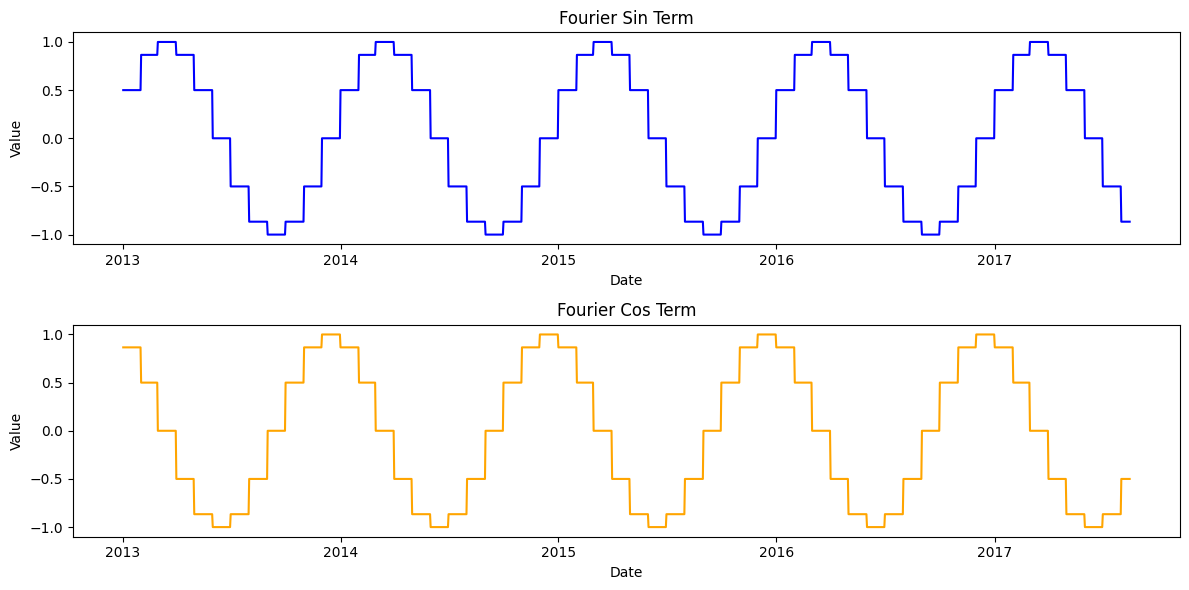

In [48]:
# Plotting the Fourier terms
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_combined['date'], df_combined['fourier_sin'], label='Fourier Sin', color='blue')
plt.title('Fourier Sin Term')
plt.xlabel('Date')
plt.ylabel('Value')

plt.subplot(2, 1, 2)
plt.plot(df_combined['date'], df_combined['fourier_cos'], label='Fourier Cos', color='orange')
plt.title('Fourier Cos Term')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


* fourier series shows seasonal high in dezember und March (holiday?) und lows in april and oktober

In [49]:
# Create seasonal lags (lag of sales from the same month last year)
df_combined['lag_12_sales'] = df_combined['sales'].shift(12)

# Optionally create additional seasonal lags
df_combined['lag_6_sales'] = df_combined['sales'].shift(6)  # 6 months ago
df_combined['lag_3_sales'] = df_combined['sales'].shift(3)  # 3 months ago

# Reset index if needed
df_combined.reset_index(inplace=True)

# Display the DataFrame to check the results
print(df_combined.head(15))


    index       date    id  store_nbr                      family    sales   
0    1871 2013-01-02  1871         11                   MAGAZINES    0.000  \
1    1872 2013-01-02  1872         11                       MEATS  832.541   
2    1873 2013-01-02  1873         11               PERSONAL CARE  604.000   
3    1874 2013-01-02  1874         11                PET SUPPLIES    0.000   
4    1875 2013-01-02  1875         11     PLAYERS AND ELECTRONICS    0.000   
5    1876 2013-01-02  1876         11                     POULTRY  548.031   
6    1877 2013-01-02  1877         11              PREPARED FOODS   31.000   
7    1878 2013-01-02  1878         11                     PRODUCE    0.000   
8    1879 2013-01-02  1879         11  SCHOOL AND OFFICE SUPPLIES    0.000   
9    1880 2013-01-02  1880         11                     SEAFOOD    5.000   
10   1881 2013-01-02  1881         12                  AUTOMOTIVE    4.000   
11   1882 2013-01-02  1882         12                   BABY CAR

### Open Questions:
* More EDA needed for Understanding the oil price
* why is the oil price highly correlated with date? 
* to many product family categories, summarize them?
* stores.csv 
* holiday.csv
* transactions.csv

OIL PRICES OVER TIME

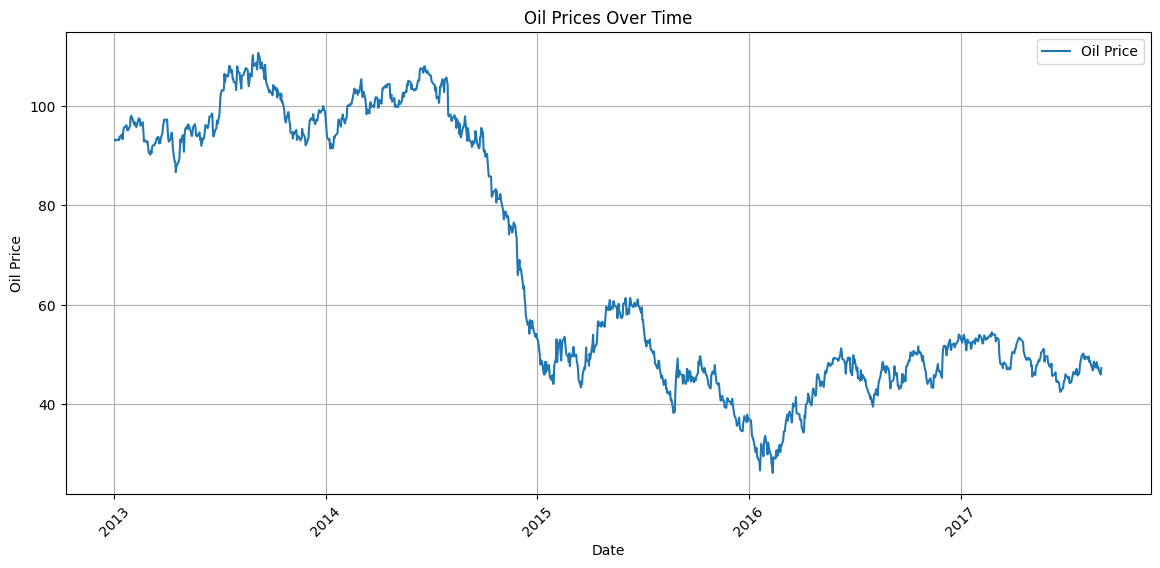

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.plot(df_oil['date'], df_oil['dcoilwtico'], label='Oil Price')  
plt.title('Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


OIL PRICES AND SALES OVER TIME

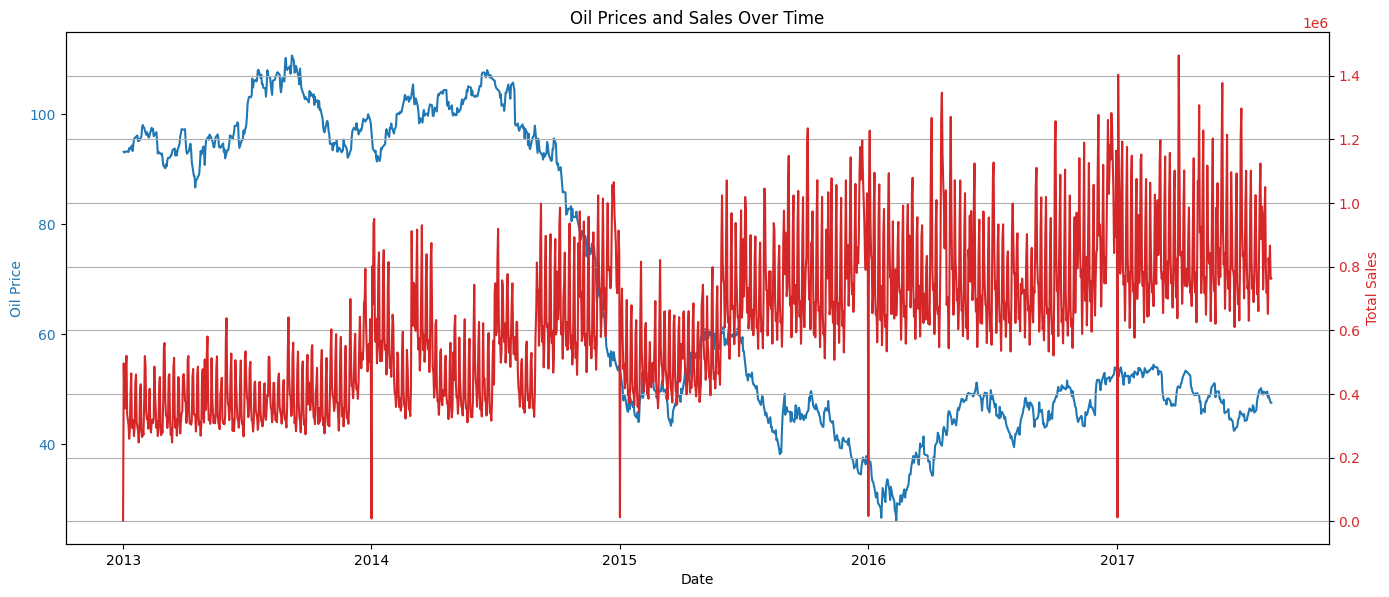

In [43]:
# Ensure the correct variable names for oil and sales data
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate total sales per date from the training dataset (df_train)
sales_per_day = df_train.groupby('date')['sales'].sum().reset_index()

# Ensure oil and sales data have the same date range (if necessary, merge or filter)
df_oil_sales = pd.merge(df_oil, sales_per_day, on='date', how='inner')

# Create a plot with two y-axes: one for oil prices and one for sales
fig, ax1 = plt.subplots(figsize=(14, 6))

# First y-axis for oil prices
ax1.set_xlabel('Date')
ax1.set_ylabel('Oil Price', color='tab:blue')
ax1.plot(df_oil_sales['date'], df_oil_sales['dcoilwtico'], color='tab:blue', label='Oil Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Second y-axis for sales
ax2 = ax1.twinx()  # instantiate a second y-axis sharing the same x-axis
ax2.set_ylabel('Total Sales', color='tab:red')  # set label for the second y-axis
ax2.plot(df_oil_sales['date'], df_oil_sales['sales'], color='tab:red', label='Total Sales')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add grid and title
fig.tight_layout()  # ensure the right y-axis does not overlap
plt.title('Oil Prices and Sales Over Time')
plt.grid(True)
plt.show()

STORE COUNT

Number of stores is constant --> 54 stores

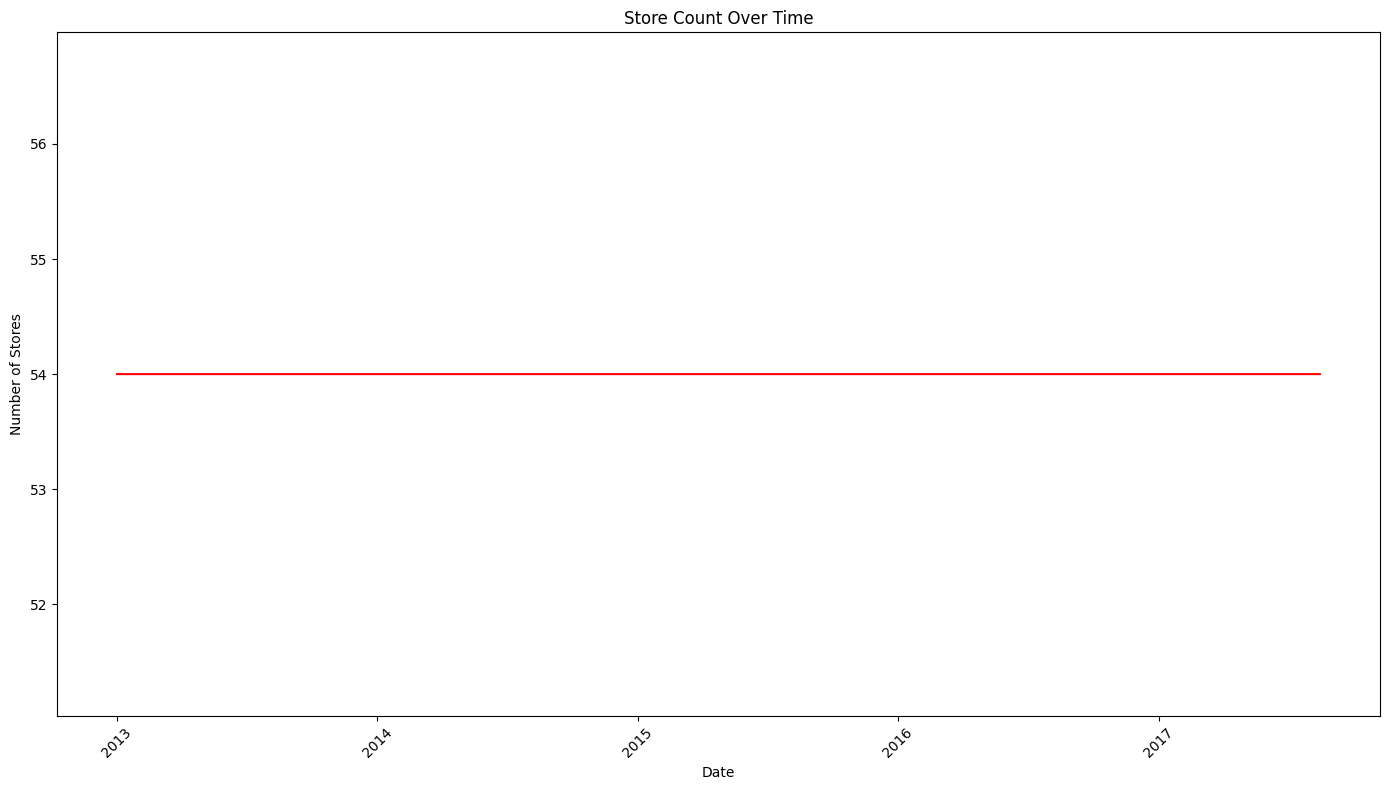

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Group by 'date' and calculate the unique store count
df_stores_over_time = df_train.groupby('date')['store_nbr'].nunique().reset_index()
df_stores_over_time.rename(columns={'store_nbr': 'store_count'}, inplace=True)

# Step 2: Plot store count over time
plt.figure(figsize=(14, 8))

# Plot store count only
plt.plot(df_stores_over_time['date'], df_stores_over_time['store_count'], label='Store Count', color='red')

# Adding titles and labels
plt.title('Store Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stores')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

HOLIDAY ANALYSIS

*Holidays and Events, with metadata

*NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer. For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. 

*Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

*Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

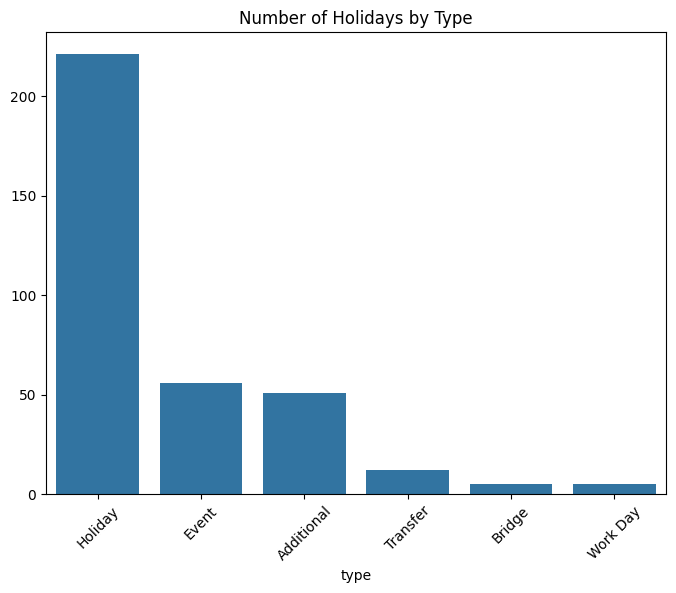

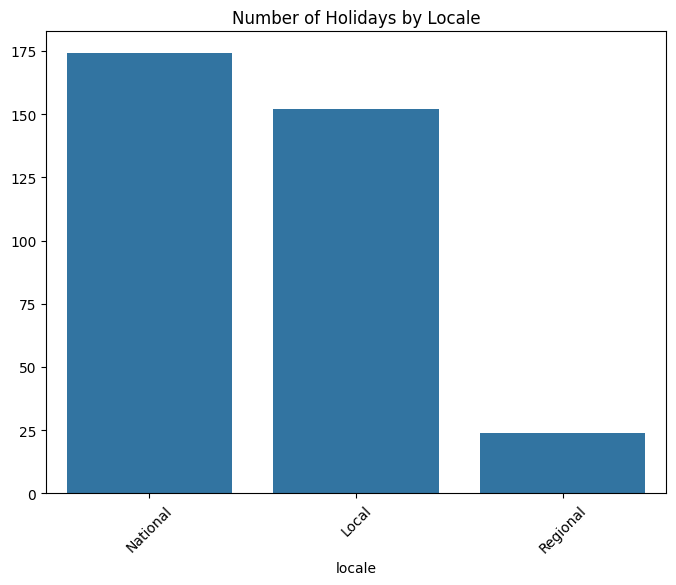

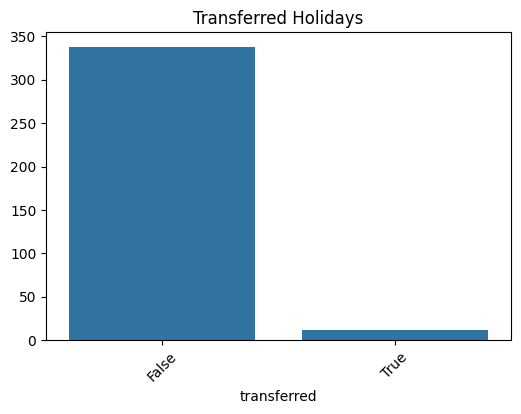

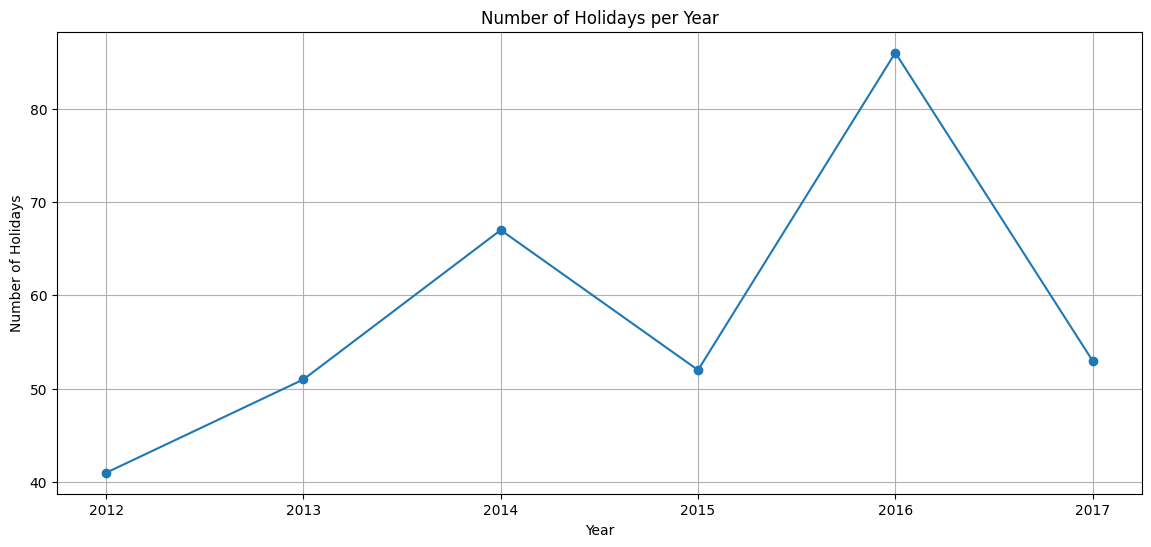

In [45]:
holiday_type_count = df_holidays['type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=holiday_type_count.index, y=holiday_type_count.values)
plt.title('Number of Holidays by Type')
plt.xticks(rotation=45)
plt.show()

# Distribution of holidays by locale
holiday_locale_count = df_holidays['locale'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=holiday_locale_count.index, y=holiday_locale_count.values)
plt.title('Number of Holidays by Locale')
plt.xticks(rotation=45)
plt.show()

# Transferred holidays
holiday_transferred_count = df_holidays['transferred'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_transferred_count.index, y=holiday_transferred_count.values)
plt.title('Transferred Holidays')
plt.xticks(rotation=45)
plt.show()

# Holidays over time
df_holidays['year'] = df_holidays['date'].dt.year
holidays_per_year = df_holidays['year'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
plt.plot(holidays_per_year.index, holidays_per_year.values, marker='o', linestyle='-')
plt.title('Number of Holidays per Year')
plt.xlabel('Year')
plt.ylabel('Number of Holidays')
plt.grid(True)

Pattern Bridge/Workday

Result: Difficult to find a pattern between bridge and workday

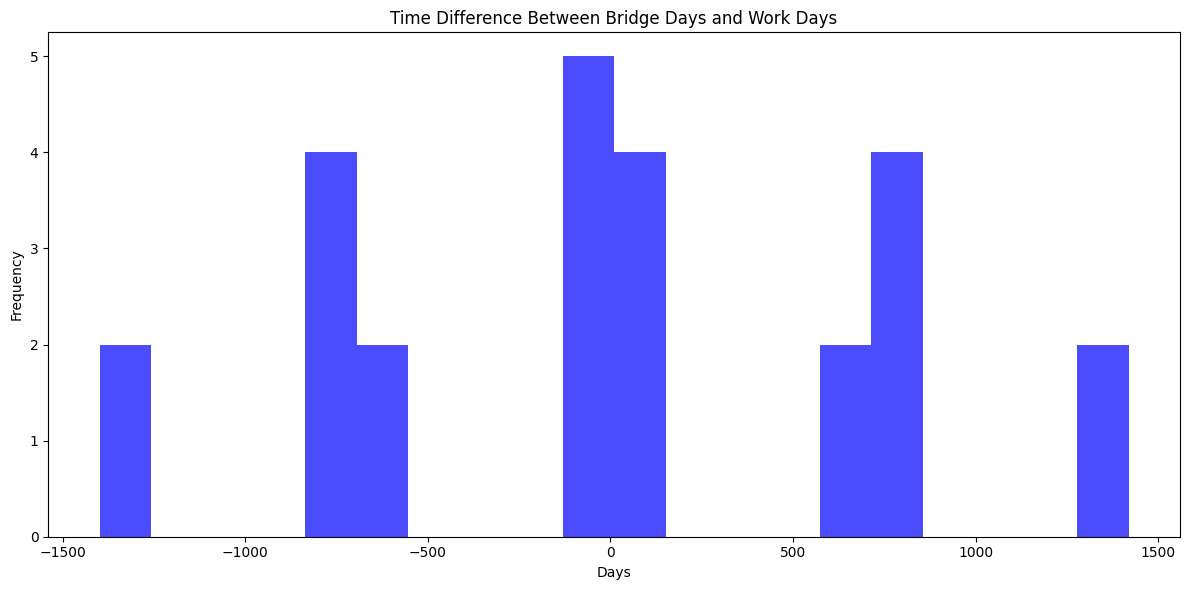

Bridge Days and Corresponding Work Days:
   date_bridge  date_work time_difference
0   2012-12-24 2013-01-05         12 days
1   2012-12-24 2013-01-12         19 days
2   2012-12-24 2014-12-20        726 days
3   2012-12-24 2015-01-10        747 days
4   2012-12-24 2016-11-12       1419 days
5   2012-12-31 2013-01-05          5 days
6   2012-12-31 2013-01-12         12 days
7   2012-12-31 2014-12-20        719 days
8   2012-12-31 2015-01-10        740 days
9   2012-12-31 2016-11-12       1412 days
10  2014-12-26 2013-01-05       -720 days
11  2014-12-26 2013-01-12       -713 days
12  2014-12-26 2014-12-20         -6 days
13  2014-12-26 2015-01-10         15 days
14  2014-12-26 2016-11-12        687 days
15  2015-01-02 2013-01-05       -727 days
16  2015-01-02 2013-01-12       -720 days
17  2015-01-02 2014-12-20        -13 days
18  2015-01-02 2015-01-10          8 days
19  2015-01-02 2016-11-12        680 days
20  2016-11-04 2013-01-05      -1399 days
21  2016-11-04 2013-01-12      -139

In [100]:
import pandas as pd


# Step 1: Handle transferred holidays
# Create a column to mark if a holiday is actually celebrated
df_holidays['celebrated_on'] = df_holidays.apply(lambda x: x['date'] if x['transferred'] == False else pd.NaT, axis=1)

# Find the actual celebration date for transferred holidays
for index, row in df_holidays.iterrows():
    if row['transferred'] == True:
        # Find the corresponding row where type is 'Transfer'
        transfer_row = df_holidays[(df_holidays['description'] == row['description']) & (df_holidays['type'] == 'Transfer')]
        if not transfer_row.empty:
            df_holidays.at[index, 'celebrated_on'] = transfer_row['date'].values[0]

# Step 2: Identify bridge days
# Bridge days are directly identified by the 'type' column
df_holidays['is_bridge_day'] = df_holidays['type'] == 'Bridge'

# Step 3: Identify work days that compensate for bridge days
# These are marked by the 'type' column being 'Work Day'
df_holidays['is_work_day'] = df_holidays['type'] == 'Work Day'

# Step 4: Analyze the relationship between bridge days and workdays
# Filter for bridge days and workdays
bridge_days = df_holidays[df_holidays['is_bridge_day'] == True]
work_days = df_holidays[df_holidays['is_work_day'] == True]

# Step 5: Merge bridge days with workdays
# Create a Cartesian join (full outer merge) to find relationships between bridge and workdays
bridge_work_diff = pd.merge(bridge_days[['date', 'description']], work_days[['date', 'description']], how='cross', suffixes=('_bridge', '_work'))

# Step 6: Calculate time difference between bridge days and workdays
bridge_work_diff['time_difference'] = bridge_work_diff['date_work'] - bridge_work_diff['date_bridge']

# Drop NaT values in time_difference
bridge_work_diff.dropna(subset=['time_difference'], inplace=True)

# Step 7: Visualize the time difference between bridge days and workdays
plt.figure(figsize=(12, 6))
plt.hist(bridge_work_diff['time_difference'].dt.days, bins=20, color='blue', alpha=0.7)
plt.title('Time Difference Between Bridge Days and Work Days')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Print out bridge and work day patterns
print("Bridge Days and Corresponding Work Days:")
print(bridge_work_diff[['date_bridge', 'date_work', 'time_difference']])

CORRELATION BETWEEN HOLIDAYS AND SALES

Average Sales on Holidays vs Non-Holidays:
   is_holiday       sales
0       False  352.159181
1        True  393.864762


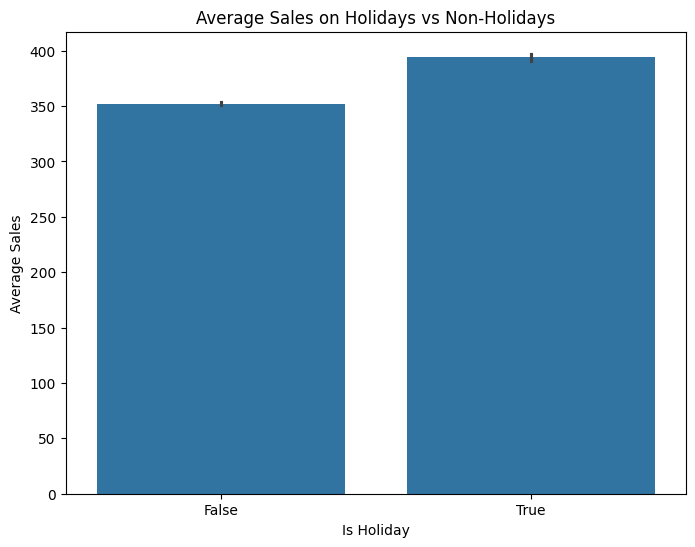

T-statistic: 22.04458591347302
P-value: 1.1783297381094665e-107
There is a statistically significant difference in sales on holidays compared to non-holidays.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: Merge the holidays and train datasets on the 'date' column
df_sales_holidays = pd.merge(df_train, df_holidays[['date', 'type']], on='date', how='left')

# Step 2: Create a new column 'is_holiday' that is True if the date is a holiday, otherwise False
df_sales_holidays['is_holiday'] = df_sales_holidays['type'].notna()

# Step 3: Group by 'is_holiday' to compare sales on holidays vs non-holidays
avg_sales_holiday = df_sales_holidays.groupby('is_holiday')['sales'].mean().reset_index()

print("Average Sales on Holidays vs Non-Holidays:")
print(avg_sales_holiday)

# Step 4: Plotting sales on holidays vs non-holidays
plt.figure(figsize=(8, 6))
sns.barplot(x='is_holiday', y='sales', data=df_sales_holidays)
plt.title('Average Sales on Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Sales')
plt.show()

# Step 5: Perform a t-test to check if the difference in sales on holidays vs non-holidays is statistically significant
holiday_sales = df_sales_holidays[df_sales_holidays['is_holiday'] == True]['sales']
non_holiday_sales = df_sales_holidays[df_sales_holidays['is_holiday'] == False]['sales']

t_stat, p_value = stats.ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in sales on holidays compared to non-holidays.")
else:
    print("There is no statistically significant difference in sales on holidays compared to non-holidays.")

Interpretation of the Result:

You have obtained the following results:

	•	T-statistic: 22.04
	•	P-value: 1.18 \times 10^{-107}

1. T-statistic:

	•	The T-statistic of 22.04 is a measure of how many standard deviations the means of the two groups (sales on holidays vs. sales on non-holidays) are apart. A high absolute value of the T-statistic indicates that the difference between the two groups is substantial.
	•	In this case, the value of 22.04 is extremely large, indicating a very strong difference between sales on holidays and non-holidays.

2. P-value:

	•	The P-value of 1.18 \times 10^{-107} is exceedingly small. The P-value represents the probability that the observed difference (or a more extreme one) would occur by chance if there were actually no difference between the two groups.
	•	A P-value this small is far below the conventional significance threshold of 0.05 (or even stricter levels like 0.01 or 0.001). This means the probability of observing such a large difference by chance is practically zero.

3. Conclusion:

	•	Since the P-value is much smaller than 0.05, we reject the null hypothesis that there is no difference in sales between holidays and non-holidays.
	•	This result confirms that there is a statistically significant difference in sales on holidays compared to non-holidays.
	•	In other words, sales on holidays are meaningfully different from sales on non-holidays, and this difference is not due to random chance.

Business Interpretation:

	•	Sales are likely higher (or lower) on holidays compared to regular days, depending on the direction of the difference. You can confirm this by looking at the average sales for holidays versus non-holidays.
	•	This insight can be very valuable for forecasting, planning, and inventory management. For example, if sales tend to increase significantly during holidays, grocery stores or retailers could adjust their inventory and staffing to meet the higher demand.

SALES BY TYPE OF HOLIDAYS

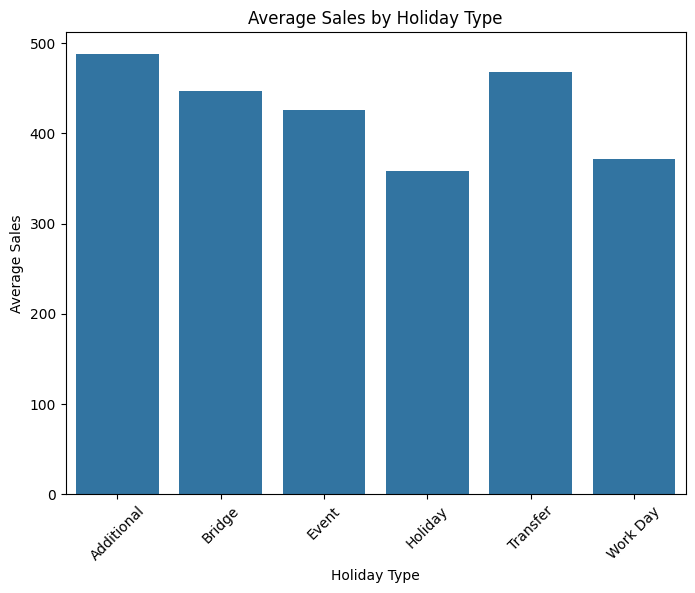

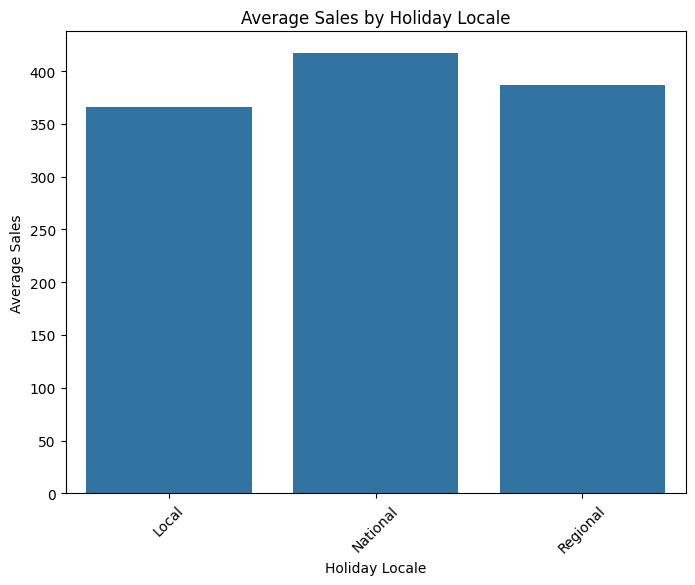

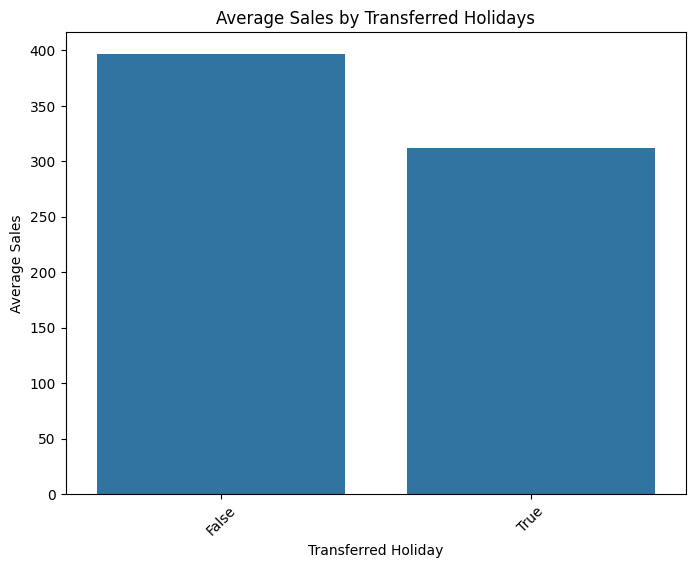

In [47]:
# Step 1: Analyze Sales by Different Types of Holidays

# Merge the holidays and train datasets on the 'date' column
df_sales_holidays = pd.merge(df_train, df_holidays[['date', 'type', 'locale', 'transferred']], on='date', how='left')

# Filter for holiday dates only
holiday_sales = df_sales_holidays[df_sales_holidays['type'].notna()]

# Group sales by holiday type and calculate average sales
avg_sales_by_type = holiday_sales.groupby('type')['sales'].mean().reset_index()

# Plot average sales by holiday type
plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='sales', data=avg_sales_by_type)
plt.title('Average Sales by Holiday Type')
plt.xlabel('Holiday Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

# Group sales by holiday locale and calculate average sales
avg_sales_by_locale = holiday_sales.groupby('locale')['sales'].mean().reset_index()

# Plot average sales by holiday locale (National, Regional, Local)
plt.figure(figsize=(8, 6))
sns.barplot(x='locale', y='sales', data=avg_sales_by_locale)
plt.title('Average Sales by Holiday Locale')
plt.xlabel('Holiday Locale')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

# Group sales by transferred status and calculate average sales
avg_sales_by_transferred = holiday_sales.groupby('transferred')['sales'].mean().reset_index()

# Plot average sales by transferred holidays
plt.figure(figsize=(8, 6))
sns.barplot(x='transferred', y='sales', data=avg_sales_by_transferred)
plt.title('Average Sales by Transferred Holidays')
plt.xlabel('Transferred Holiday')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

Investigate Seasonal Patterns in Sales by Holidays

<Figure size 1200x600 with 0 Axes>

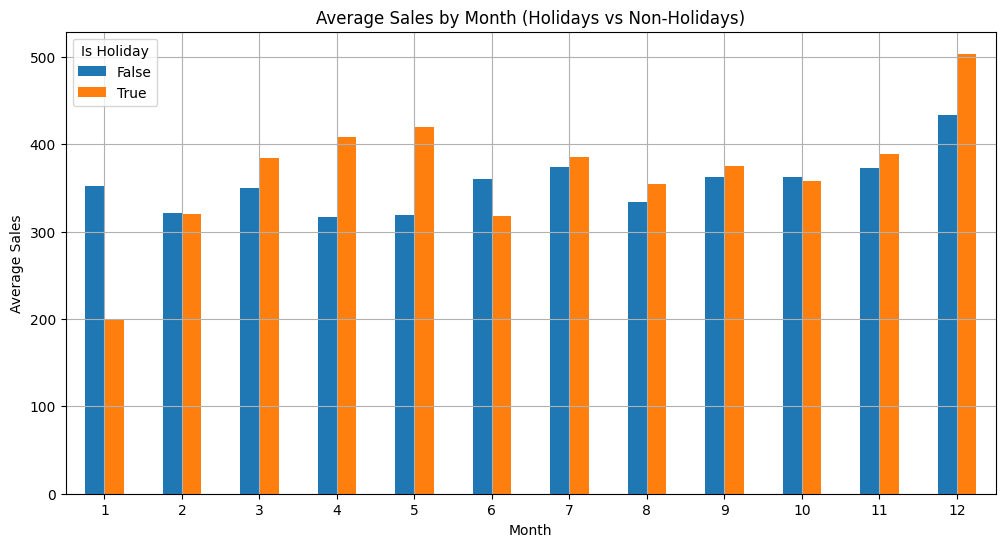

In [84]:
# Step 1: Ensure 'is_holiday' column is created
# Merge the holidays and train datasets on the 'date' column
df_sales_holidays = pd.merge(df_train, df_holidays[['date', 'type']], on='date', how='left')

# Create a new column 'is_holiday' that is True if the date is a holiday, otherwise False
df_sales_holidays['is_holiday'] = df_sales_holidays['type'].notna()

# Step 2: Investigate Seasonal Patterns in Sales

# Create a month column from the date
df_sales_holidays['month'] = df_sales_holidays['date'].dt.month

# Group sales by month and check average sales during holidays and non-holidays
monthly_sales_holiday = df_sales_holidays.groupby(['month', 'is_holiday'])['sales'].mean().unstack()

# Plot seasonal sales patterns (Holidays vs Non-Holidays)
plt.figure(figsize=(12, 6))
monthly_sales_holiday.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Average Sales by Month (Holidays vs Non-Holidays)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.legend(title='Is Holiday')
plt.grid(True)
plt.show()

HOLIDAY IN JANUARY

In [101]:
import pandas as pd

# Assuming df_holidays has been loaded and 'date' is in datetime format

# Filter holidays that occur in January
df_january_holidays = df_holidays[df_holidays['date'].dt.month == 1]

# Display holidays that occur in January
print(df_january_holidays[['date', 'description', 'type', 'transferred']])

          date                         description      type  transferred
41  2013-01-01                  Primer dia del ano   Holiday        False
42  2013-01-05             Recupero puente Navidad  Work Day        False
43  2013-01-12  Recupero puente primer dia del ano  Work Day        False
92  2014-01-01                  Primer dia del ano   Holiday        False
159 2015-01-01                  Primer dia del ano   Holiday        False
160 2015-01-02           Puente Primer dia del ano    Bridge        False
161 2015-01-10  Recupero Puente Primer dia del ano  Work Day        False
211 2016-01-01                  Primer dia del ano   Holiday        False
297 2017-01-01                  Primer dia del ano   Holiday         True
298 2017-01-02         Traslado Primer dia del ano  Transfer        False


STORES BY TYPE, CLUSTER AND REGION

Basic Information of the Stores Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

Missing Values in Stores Data:
store_nbr    0
city         0
state        0
type         0

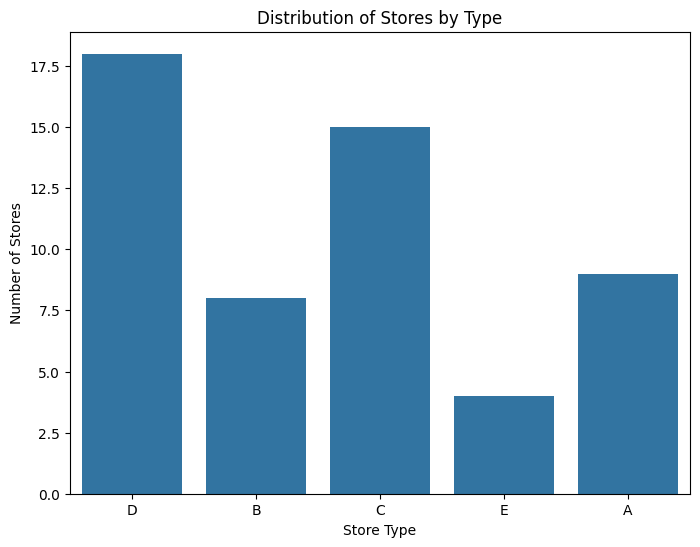

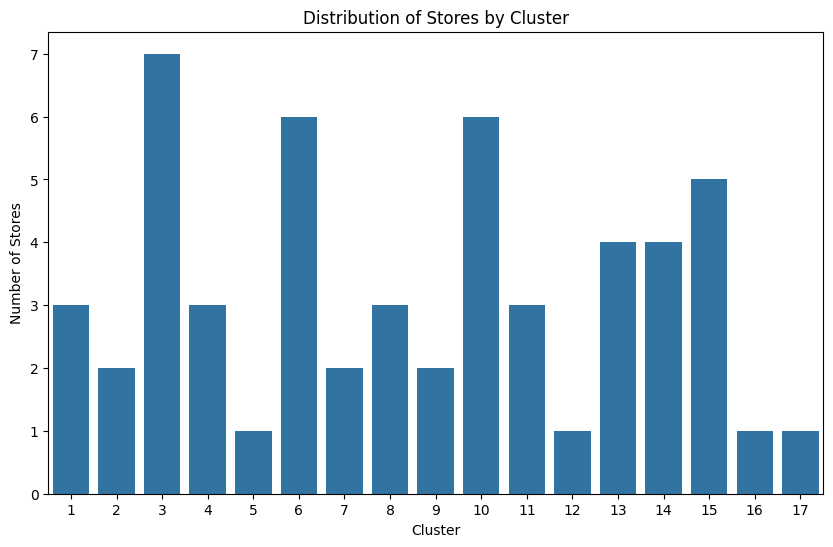

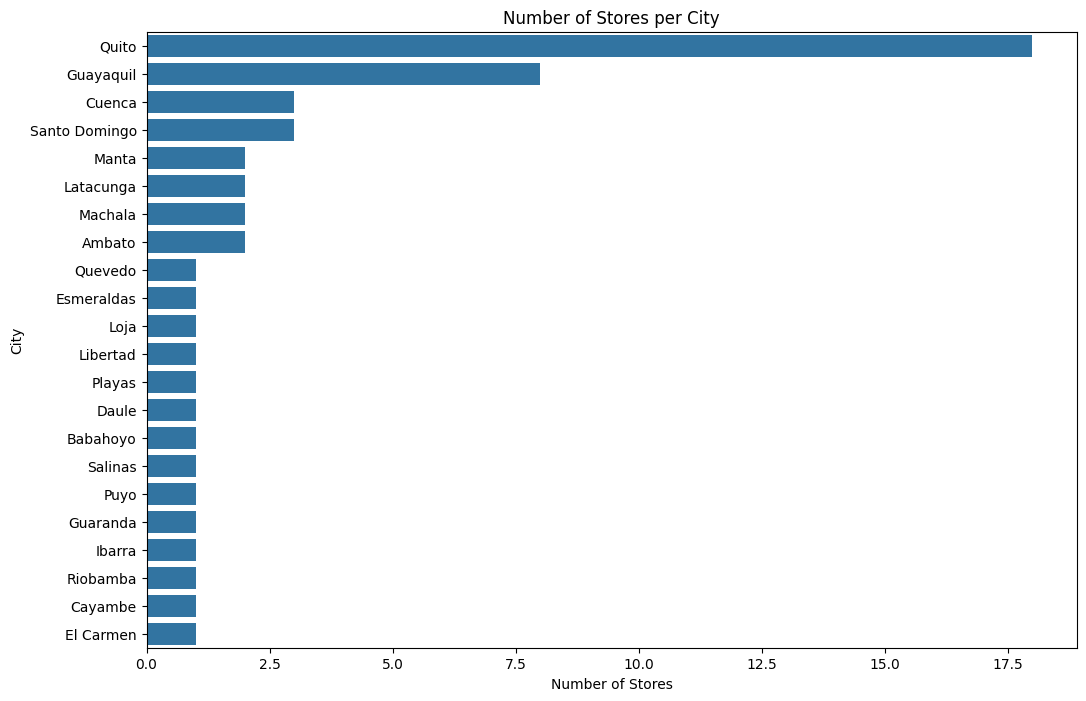

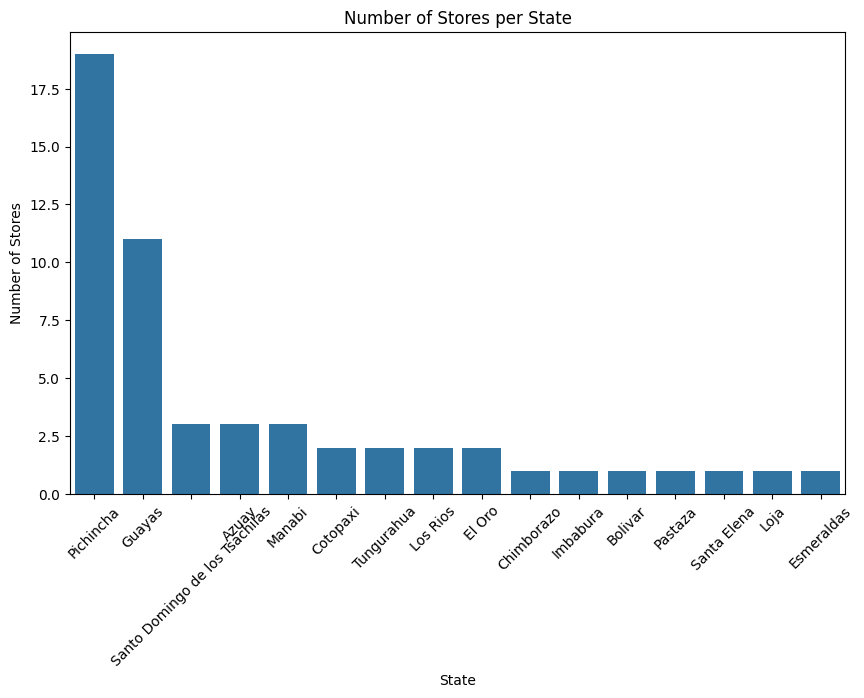

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Basic Info of the dataset
print("Basic Information of the Stores Dataset")
df_stores.info()
print(df_stores.head())

# Step 2: Check for missing values in the dataset
print("\nMissing Values in Stores Data:")
print(df_stores.isnull().sum())

# Step 3: Descriptive statistics of numeric columns
print("\nDescriptive Statistics of Numeric Columns:")
print(df_stores.describe())

# Step 4: Explore Unique Values in Categorical Columns
print("\nUnique Values in Categorical Columns:")
print(f"Unique Cities: {df_stores['city'].nunique()}")
print(f"Unique States: {df_stores['state'].nunique()}")
print(f"Unique Store Types: {df_stores['type'].nunique()}")
print(f"Unique Clusters: {df_stores['cluster'].nunique()}")

# Step 5: Visualization - Distribution of Stores by Type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df_stores)
plt.title('Distribution of Stores by Type')
plt.xlabel('Store Type')
plt.ylabel('Number of Stores')
plt.show()

# Step 6: Visualization - Distribution of Stores by Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df_stores)
plt.title('Distribution of Stores by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Stores')
plt.show()

# Step 7: City-wise Distribution of Stores
plt.figure(figsize=(12, 8))
sns.countplot(y='city', data=df_stores, order=df_stores['city'].value_counts().index)
plt.title('Number of Stores per City')
plt.xlabel('Number of Stores')
plt.ylabel('City')
plt.show()

# Step 8: State-wise Distribution of Stores
plt.figure(figsize=(10, 6))
sns.countplot(x='state', data=df_stores, order=df_stores['state'].value_counts().index)
plt.title('Number of Stores per State')
plt.xlabel('State')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)
plt.show()




STORE SALES BY TYPE, CLUSTER, CITY AND STATE



In the stores.csv file, the columns type and cluster likely represent characteristics of the stores:

1. type:

	•	This column likely categorizes the store based on its format or size. It might represent different types of stores within the supermarket chain, such as:
	•	D: A larger, possibly hypermarket-style store.
	•	C: A smaller, convenience-style store.
	•	A/B: Medium-sized supermarkets or specialty formats.
	•	These types could define the level of service or the range of products offered, distinguishing between full-scale supermarkets, smaller local stores, and possibly warehouse-style outlets.

2. cluster:

	•	The cluster column groups stores into clusters based on similar attributes. Stores in the same cluster might share similar characteristics, such as:
	•	Customer demographics.
	•	Store size and location.
	•	Sales patterns or performance.
	•	Clustering could be used to segment stores for personalized marketing or store-specific strategies, such as optimizing promotions, pricing, and inventory management. Each store within a cluster could have similar buying behavior, enabling more targeted operational decisions.


Average Sales by Store Type:
  type       sales
0    A  705.878743
1    B  326.739714
2    C  197.263301
3    D  350.979407
4    E  269.121301

Average Sales by Store Cluster:
    cluster        sales
0         1   326.163967
1         2   260.170621
2         3   194.416262
3         4   296.572872
4         5  1117.245254
5         6   342.661732
6         7   139.261863
7         8   647.377856
8         9   274.968339
9        10   255.897546
10       11   603.507018
11       12   324.461406
12       13   324.364108
13       14   708.227718
14       15   199.010111
15       16   238.598137
16       17   592.231511


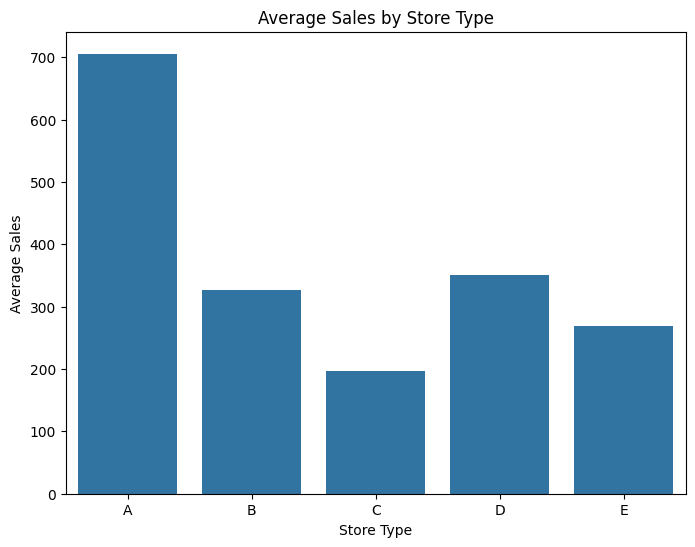

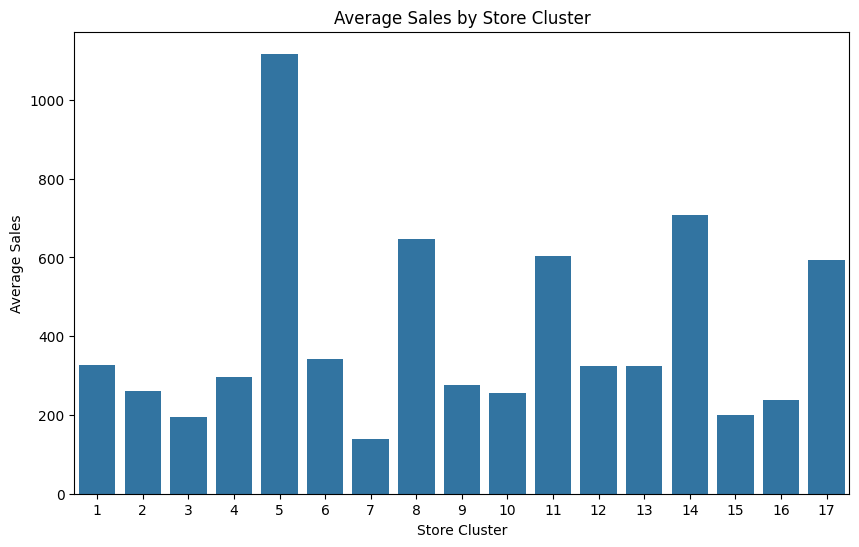

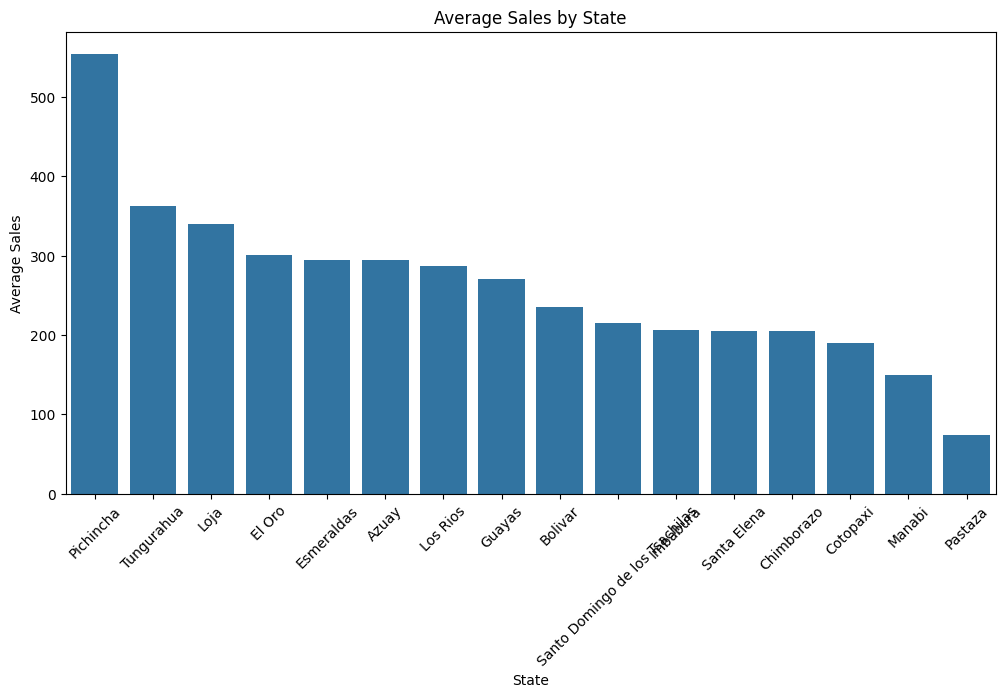

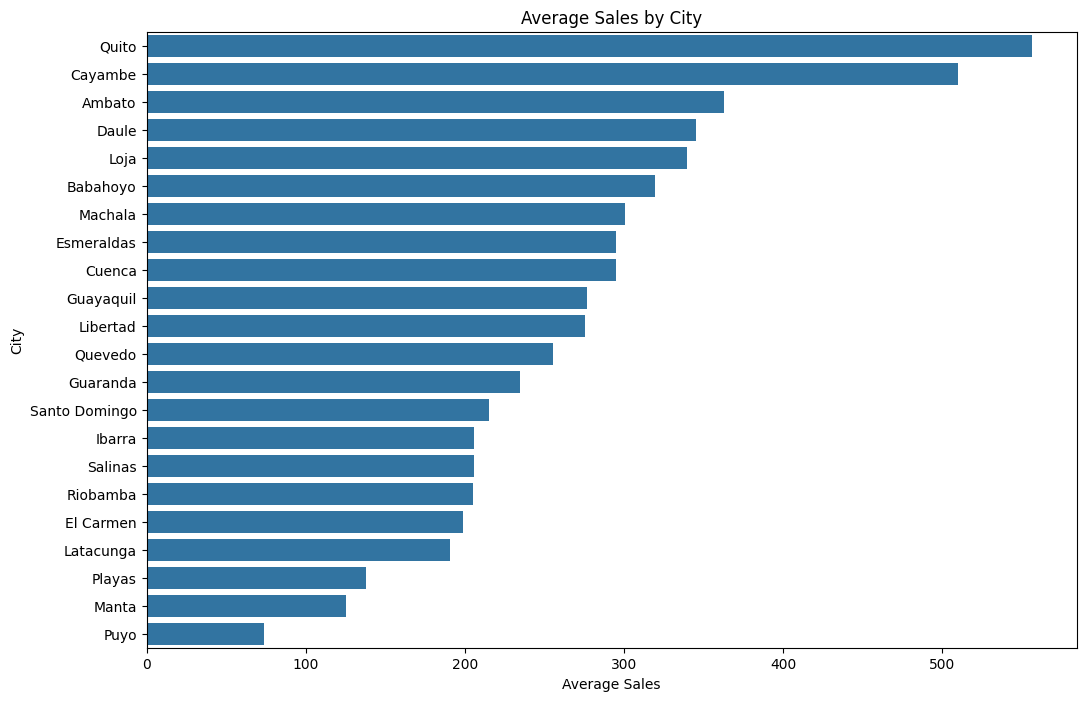

In [81]:
# Step 1: Merge the stores data with the sales data
# Assuming 'store_nbr' is the common column between df_train_with_dates and df_stores
df_merged = pd.merge(df_train_with_dates, df_stores, on='store_nbr', how='left')
# Merge the stores data with the sales data on 'store_nbr'
df_merged_sales_stores = pd.merge(df_train_with_dates, df_stores, on='store_nbr', how='left')

# Step 2: Group by 'type' and 'cluster' to calculate the average sales
avg_sales_by_type = df_merged.groupby('type')['sales'].mean().reset_index()
avg_sales_by_cluster = df_merged.groupby('cluster')['sales'].mean().reset_index()


# Print the results
print("Average Sales by Store Type:")
print(avg_sales_by_type)

print("\nAverage Sales by Store Cluster:")
print(avg_sales_by_cluster)

# Step 3: Visualize the relationship between 'type', 'cluster', and sales
import matplotlib.pyplot as plt
import seaborn as sns

# Barplot for average sales by store type
plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='sales', data=avg_sales_by_type)
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.show()

# Barplot for average sales by store cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='sales', data=avg_sales_by_cluster)
plt.title('Average Sales by Store Cluster')
plt.xlabel('Store Cluster')
plt.ylabel('Average Sales')
plt.show()


# Step 1: Group by state and calculate the average sales
avg_sales_by_state = df_merged_sales_stores.groupby('state')['sales'].mean().reset_index()

# Step 2: Group by city and calculate the average sales
avg_sales_by_city = df_merged_sales_stores.groupby('city')['sales'].mean().reset_index()

# Step 3: Plot the average sales by state
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='sales', data=avg_sales_by_state, order=avg_sales_by_state.sort_values('sales', ascending=False)['state'])
plt.title('Average Sales by State')
plt.xlabel('State')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

# Step 4: Plot the average sales by city
plt.figure(figsize=(12, 8))
sns.barplot(y='city', x='sales', data=avg_sales_by_city, order=avg_sales_by_city.sort_values('sales', ascending=False)['city'])
plt.title('Average Sales by City')
plt.xlabel('Average Sales')
plt.ylabel('City')
plt.show()
